<a href="https://colab.research.google.com/github/Dhwani-48/room_occupancy/blob/main/files/Project_Room_Occupancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

Data Collection and Analysis

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
# loading the dataset of room occupancy
occupancy_dataset= pd.read_csv('/content/drive/My Drive/rishabh/occupancy.csv')

In [ ]:
#printing first five rows of dataset
occupancy_dataset.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
# number of rows and columns in dataset
occupancy_dataset.shape

(20560, 7)

In [ ]:
occupied = occupancy_dataset[occupancy_dataset.Occupancy==1]
occupied.shape

(4750, 7)

In [ ]:
not_occupied = occupancy_dataset[occupancy_dataset.Occupancy==0]
not_occupied.shape

(15810, 7)

In [ ]:
occupancy_dataset['Occupancy'].value_counts()

0    15810
1     4750
Name: Occupancy, dtype: int64

<BarContainer object of 20560 artists>

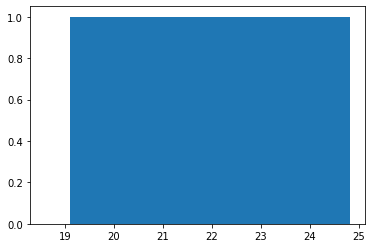

In [10]:
%matplotlib inline
plt.bar(occupancy_dataset['Temperature'],occupancy_dataset['Occupancy'])

<BarContainer object of 20560 artists>

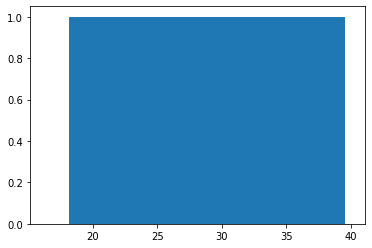

In [11]:
%matplotlib inline
plt.bar(occupancy_dataset['Humidity'],occupancy_dataset['Occupancy'])

<BarContainer object of 20560 artists>

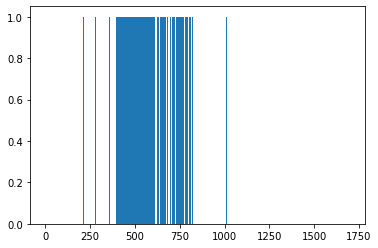

In [12]:
%matplotlib inline
plt.bar(occupancy_dataset['Light'],occupancy_dataset['Occupancy'])

<BarContainer object of 20560 artists>

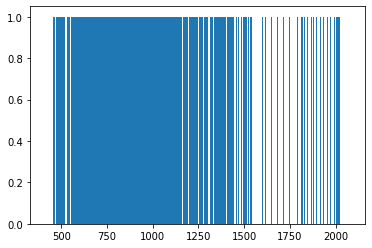

In [13]:
%matplotlib inline
plt.bar(occupancy_dataset['CO2'],occupancy_dataset['Occupancy'])

<BarContainer object of 20560 artists>

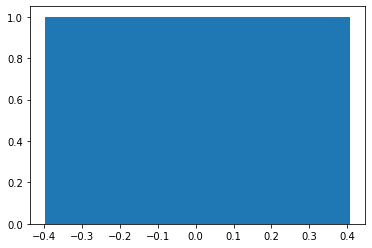

In [14]:
%matplotlib inline
plt.bar(occupancy_dataset['HumidityRatio'],occupancy_dataset['Occupancy'])

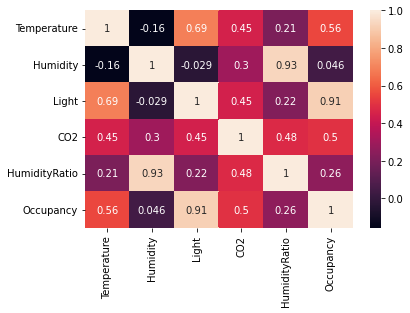

In [15]:
sns.heatmap(occupancy_dataset.corr(), annot=True)

In [ ]:
occupancy_dataset.groupby('Occupancy').mean()

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,
0,20.584830,27.529654,25.237893,604.996614,0.004120
1,21.975909,28.076209,481.967380,975.321870,0.004589


**Temperature**: Temperature seems to be relatively low (20.58) when the room is not occupied vs the occupied ones (21.97)

**Humidity**: Humidity is lower (27.52) when the room is not occupied and higher (28.07) when room is occupied

**Light**: Light is higher (481.96) when room is occupied vs unoccupied once (25.23) 

**CO2**: CO2 is higher (975.32) when room is occupied vs unoccupied once (604.99)

**HumidityRatio**: it is similer in both cases hence we will ignore humidityratio in our analysis 
 

In [ ]:
# getting satistical analysis of data
occupancy_dataset.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Declaring Variables

In [ ]:
# seperating the data and labels
X = occupancy_dataset.drop(['Occupancy','date','HumidityRatio'],axis=1)
Y = occupancy_dataset['Occupancy']

In [ ]:
# print(X)
X

,Temperature,Humidity,Light,CO2
0,23.7000,26.2720,585.200000,749.200000
1,23.7180,26.2900,578.400000,760.400000
2,23.7300,26.2300,572.666667,769.666667
3,23.7225,26.1250,493.750000,774.750000
4,23.7540,26.2000,488.600000,779.000000
...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000
20556,20.8650,27.7450,423.500000,1514.500000
20557,20.8900,27.7450,423.500000,1521.500000
20558,20.8900,28.0225,418.750000,1632.000000


In [ ]:
# print(Y)
Y

0        1
1        1
2        1
3        1
4        1
        ..
20555    1
20556    1
20557    1
20558    1
20559    1
Name: Occupancy, Length: 20560, dtype: int64

Data Standardization

In [ ]:
# scaler = StandardScaler()

In [ ]:
# standardized_data = scaler.fit_transform(X)

In [ ]:
# print(standardized_data)
# standardized_data

In [ ]:
# X = standardized_data
# Y = occupancy_dataset['Occupancy']

In [ ]:
# print(X)
# print(Y)

Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)
#stratify for splitting dataset which will not led to move all 1 output in X and 0 in Y it will be equal

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20560, 4) (16448, 4) (4112, 4)


Training the model-SVM, Random Forest Classifier, Logistic Regression

In [ ]:
classifier_svm = svm.SVC(kernel= 'linear')
classifier_rfc = RandomForestClassifier()
classifier_lr = LogisticRegression()

In [ ]:
# training the support vector machine classifier
classifier_svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
classifier_rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
classifier_lr.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score for training data
X_train_prediction_svm = classifier_svm.predict(X_train)
train_accuracy_svm = accuracy_score(X_train_prediction_svm,Y_train)
X_train_prediction_rfc = classifier_rfc.predict(X_train)
train_accuracy_rfc = accuracy_score(X_train_prediction_rfc,Y_train)
X_train_prediction_lr = classifier_lr.predict(X_train)
train_accuracy_lr = accuracy_score(X_train_prediction_lr,Y_train)

In [ ]:
print('Accuracy Score of Training data of SVM model: ',train_accuracy_svm)
print('Accuracy Score of Training data of Random Forest model: ',train_accuracy_rfc)
print('Accuracy Score of Training data of Logistic Regression model: ',train_accuracy_lr)

Accuracy Score of Training data of SVM model:  0.9896643968871596
Accuracy Score of Training data of Random Forest model:  1.0
Accuracy Score of Training data of Logistic Regression model:  0.9897859922178989


In [ ]:
# accuracy score for testing data
X_test_prediction_svm = classifier_svm.predict(X_test)
test_accuracy_svm = accuracy_score(X_test_prediction_svm,Y_test)
X_test_prediction_rfc = classifier_rfc.predict(X_test)
test_accuracy_rfc = accuracy_score(X_test_prediction_rfc,Y_test)
X_test_prediction_lr = classifier_lr.predict(X_test)
test_accuracy_lr = accuracy_score(X_test_prediction_lr,Y_test)

In [ ]:
print('Accuracy Score of Testing data of SVM model: ',test_accuracy_svm)
print('Accuracy Score of Testing data of Random Forest model: ',test_accuracy_rfc)
print('Accuracy Score of Testing data of Logistic Regression model: ',test_accuracy_lr)

Accuracy Score of Testing data of SVM model:  0.9861381322957199
Accuracy Score of Testing data of Random Forest model:  0.9914883268482491
Accuracy Score of Testing data of Logistic Regression model:  0.9858949416342413


Prediction Heatmap

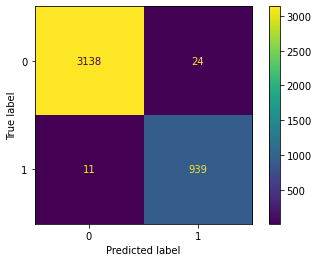

In [ ]:
# For Random Forest Classifier
con_mat = confusion_matrix(y_true=Y_test, y_pred=X_test_prediction_rfc)

ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=X_test_prediction_rfc)

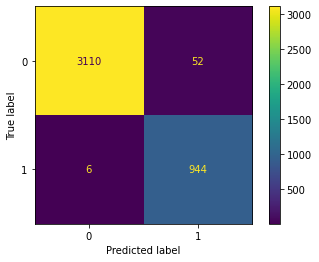

In [ ]:
# for Logisitic Regression
con_mat = confusion_matrix(y_true=Y_test, y_pred=X_test_prediction_lr)

ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=X_test_prediction_lr)

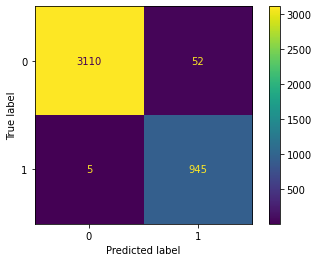

In [ ]:
# For Support Vector Machine
con_mat = confusion_matrix(y_true=Y_test, y_pred=X_test_prediction_svm)

ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=X_test_prediction_svm)

Classification report

In [ ]:
svm_report = classification_report(Y_train,X_train_prediction_svm)
print(svm_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12648
           1       0.96      1.00      0.98      3800

    accuracy                           0.99     16448
   macro avg       0.98      0.99      0.99     16448
weighted avg       0.99      0.99      0.99     16448



In [ ]:
rfc_report = classification_report(Y_train,X_train_prediction_rfc)
print(rfc_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12648
           1       1.00      1.00      1.00      3800

    accuracy                           1.00     16448
   macro avg       1.00      1.00      1.00     16448
weighted avg       1.00      1.00      1.00     16448



In [ ]:
lr_report = classification_report(Y_train,X_train_prediction_lr)
print(lr_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12648
           1       0.96      1.00      0.98      3800

    accuracy                           0.99     16448
   macro avg       0.98      0.99      0.99     16448
weighted avg       0.99      0.99      0.99     16448



Making a Predictive System

In [ ]:
input_data=(23.7180,	26.290,	578.400000	,760.400000)
# change the input data into numpy array
input_as_np_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshape = input_as_np_array.reshape(1,-1)
#standardize the input data
# std_data = scaler.transform(input_data_reshape)
# print(std_data)

prediction = classifier_svm.predict(input_data_reshape)
print(prediction)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Model testing by giving csv as input and taking csv as output

In [ ]:
test_dataset = pd.read_csv('/content/drive/My Drive/rishabh/test1.csv')

In [ ]:
remove_date = test_dataset.drop(['date','HumidityRatio'], axis=1) 

In [ ]:
prediction_of_test = classifier_rfc.predict(remove_date)

In [ ]:
test_dataset['Occupancy'] = prediction_of_test

In [ ]:
test_dataset.to_csv('/content/drive/My Drive/rishabh/roomoccupancy.csv', index=False)